In [29]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeClassifier,RidgeClassifierCV
import matplotlib.pyplot as plt

In [15]:
impfeatures = pd.read_csv('imp_finalDat.csv')
impfeatures_scaled = pd.read_csv('imp_finalDat_scaled.csv')
allfeature = pd.read_csv('mobile_data_clean_encoded.csv')
allfeature_scaled = pd.read_csv('mobile_data_clean_encoded_scaled.csv')

In [128]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

<h1>Regular Logistic Regression with important features</h1>

In [108]:
dat = impfeatures.drop('churn',axis=1)
dat = dat.drop('Customer_ID',axis=1)
target = impfeatures['churn']
X_train,X_test,Y_train,Y_test = train_test_split(dat,target,random_state=0)


       mou_Mean  totmrc_Mean  mou_Range  owylis_vce_Range  months  totcalls  \
6        421.25      44.9900      254.0                19       9       531   
32774    797.75      44.9900      458.0                 5      18      1290   
5689     165.75      29.9900       93.0                 0      18       394   
40076    713.00      17.7400      207.0                22      15      3427   
55302     78.25      39.9900       82.0                 0      13       268   
29265   2388.25     199.9900      680.0                11      26     21682   
64790    249.50       5.2400      998.0                14       7      1837   
55807    606.00      69.9900     1177.0                21       7      1261   
21331    855.25      55.1500      348.0                 9      28      4714   
42610    825.50      20.0000      157.0                25      14      4166   
49128    533.00      49.9900      266.0                 0       9      1370   
66154    235.50      29.9900      159.0             

In [110]:
logReg = LogisticRegression()
mod = logReg.fit(X_train,Y_train)
#mod.score(X_test,Y_test)

In [119]:
print("Accuracy on train data - ", mod.score(X_train,Y_train))
print("Accuracy on test data - ", mod.score(X_test,Y_test))

Accuracy on train data -  0.7591207111540164
Accuracy on test data -  0.7637405731523379


In [120]:
Y_test_pred = mod.predict(X_test)
test_probs = mod.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,test_probs[:,1])

In [121]:
# calculate AUC
auc = roc_auc_score(Y_test, test_probs[:,1])
print('AUC: %.3f' % auc)

AUC: 0.614


No handles with labels found to put in legend.


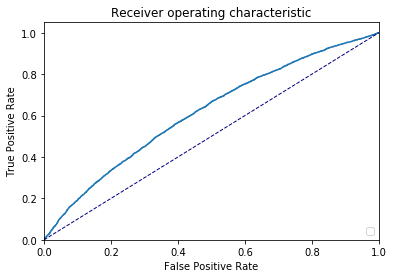

In [122]:
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [115]:
confusion=confusion_matrix(Y_test,Y_test_pred)
print(confusion)

[[12628    43]
 [ 3886    18]]


<h1>Regular Logistic Regression with All feature scaled</h1>

In [117]:
dat = allfeature_scaled.drop('churn',axis=1)
dat = dat.drop('Customer_ID',axis=1)
target = allfeature_scaled['churn']
X_train,X_test,Y_train,Y_test = train_test_split(dat,target,random_state=0)


In [123]:
logReg = LogisticRegression()
mod = logReg.fit(X_train,Y_train)
#mod.score(X_test,Y_test)

In [124]:
print("Accuracy on train data - ", mod.score(X_train,Y_train))
print("Accuracy on test data - ", mod.score(X_test,Y_test))
Y_test_pred = mod.predict(X_test)
test_probs = mod.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,test_probs[:,1])
# calculate AUC
auc = roc_auc_score(Y_test, test_probs[:,1])
print('AUC: %.3f' % auc)

Accuracy on train data -  0.7591207111540164
Accuracy on test data -  0.7637405731523379
AUC: 0.614


In [125]:
confusion=confusion_matrix(Y_test,Y_test_pred)
print(confusion)

[[12637    34]
 [ 3882    22]]


No handles with labels found to put in legend.


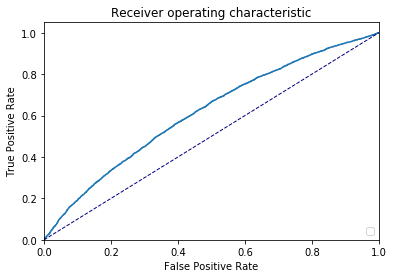

In [126]:
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [127]:
best_score = 0
final_c = None
c = [0.0001,0.001,0.01,0.1,1,10,100]
rcvMod = RidgeClassifierCV(alphas=c)
rcvModfit = rcvMod.fit(X_train,Y_train)
print("Accuracy on train data - ", mod.score(X_train,Y_train))
print("Accuracy on test data - ", mod.score(X_test,Y_test))

TypeError: __init__() got an unexpected keyword argument 'store_cv_values'

<h1>QDA and LDA with All feature scaled</h1>

In [129]:
dat = allfeature_scaled.drop('churn',axis=1)
dat = dat.drop('Customer_ID',axis=1)
target = allfeature_scaled['churn']
X_train,X_test,Y_train,Y_test = train_test_split(dat,target,random_state=0)

In [130]:
# Testing model for LDA
LDAmod = LinearDiscriminantAnalysis().fit(X_train, Y_train)

C:\Users\ISHUHOME\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [131]:
LDAmod.score(X_test,Y_test)

0.763499245852187

In [132]:
QDAmod = QuadraticDiscriminantAnalysis().fit(X_train, Y_train)

C:\Users\ISHUHOME\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [133]:
QDAmod.score(X_test,Y_test)

0.6042232277526395

In [135]:
mod = LDAmod

In [136]:
print("Accuracy on train data - ", mod.score(X_train,Y_train))
print("Accuracy on test data - ", mod.score(X_test,Y_test))
Y_test_pred = mod.predict(X_test)
test_probs = mod.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,test_probs[:,1])
# calculate AUC
auc = roc_auc_score(Y_test, test_probs[:,1])
print('AUC: %.3f' % auc)

Accuracy on train data -  0.7589397047584571
Accuracy on test data -  0.763499245852187
AUC: 0.616


In [137]:
confusion=confusion_matrix(Y_test,Y_test_pred)
print(confusion)

[[12628    43]
 [ 3877    27]]


No handles with labels found to put in legend.


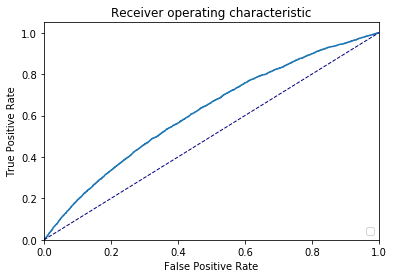

In [138]:
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

<h1>Random Forest and ADA boost on data subset</h1>

In [139]:
dat = impfeatures_scaled.drop('churn',axis=1)
dat = dat.drop('Customer_ID',axis=1)
target = impfeatures_scaled['churn']
X_train,X_test,Y_train,Y_test = train_test_split(dat,target,random_state=0)

In [140]:
rf = RandomForestClassifier (n_estimators=5, max_features=10,max_depth=100, random_state=0) 
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [143]:
Y_test_pred = rf.predict(X_test)
print('accuracy of Random forest',rf.score(X_test,Y_test))
mod = rf

accuracy of Random forest 0.7178280542986425


In [144]:
print("Accuracy on train data - ", mod.score(X_train,Y_train))
print("Accuracy on test data - ", mod.score(X_test,Y_test))
Y_test_pred = mod.predict(X_test)
test_probs = mod.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,test_probs[:,1])
# calculate AUC
auc = roc_auc_score(Y_test, test_probs[:,1])
print('AUC: %.3f' % auc)

Accuracy on train data -  0.9641808455009855
Accuracy on test data -  0.7178280542986425
AUC: 0.580


In [145]:
confusion=confusion_matrix(Y_test,Y_test_pred)
print(confusion)

[[11111  1560]
 [ 3117   787]]


No handles with labels found to put in legend.


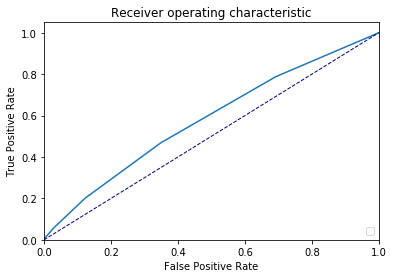

In [147]:
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [149]:
adaB = AdaBoostClassifier(n_estimators=100)
adaBMod = adaB.fit(X_train,Y_train)

In [150]:
Y_test_pred = adaBMod.predict(X_test)
print('accuracy of Ada boost',adaBMod.score(X_test,Y_test))
confusion=confusion_matrix(Y_test,Y_test_pred)
print(confusion)

accuracy of Ada boost 0.7663348416289593
[[12514   157]
 [ 3716   188]]


In [151]:
Y_test_pred = adaBMod.predict(X_test)
test_probs = adaBMod.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,test_probs[:,1])

In [152]:
# calculate AUC
auc = roc_auc_score(Y_test, test_probs[:,1])
print('ADABoost - AUC: %.3f' % auc)

ADABoost - AUC: 0.655


No handles with labels found to put in legend.


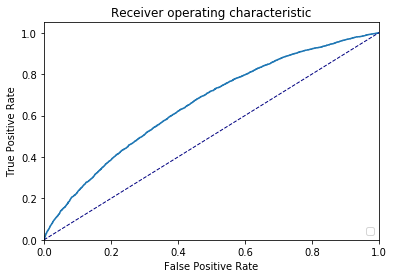

In [153]:
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

<h1>Random Forest and Ada boost using all data scaled</h1>



In [155]:
dat = allfeature_scaled.drop('churn',axis=1)
dat = dat.drop('Customer_ID',axis=1)
target = allfeature_scaled['churn']
X_train,X_test,Y_train,Y_test = train_test_split(dat,target,random_state=0)

In [156]:
rf = RandomForestClassifier (n_estimators=5, max_features=10,max_depth=100, random_state=0) 
rfMod = rf.fit(X_train,Y_train)

In [157]:

mod = rfMod
Y_test_pred = mod.predict(X_test)
print('accuracy of Random Forest',mod.score(X_test,Y_test))
confusion=confusion_matrix(Y_test,Y_test_pred)
print(confusion)

accuracy of Random Forest 0.7205429864253393
[[11181  1490]
 [ 3142   762]]


In [158]:
Y_test_pred = mod.predict(X_test)
test_probs = mod.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,test_probs[:,1])

In [159]:
# calculate AUC
auc = roc_auc_score(Y_test, test_probs[:,1])
print('Random Forest - AUC: %.3f' % auc)

Random Forest - AUC: 0.581


No handles with labels found to put in legend.


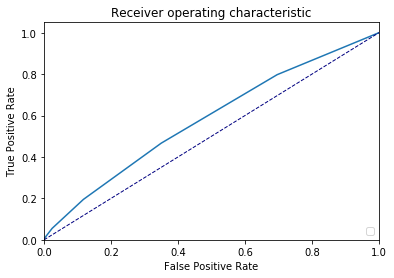

In [160]:
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [162]:
adaB = AdaBoostClassifier(n_estimators=100)
adaBMod = adaB.fit(X_train,Y_train)

In [163]:

mod = adaBMod
Y_test_pred = mod.predict(X_test)
print('accuracy of Random Forest',mod.score(X_test,Y_test))
confusion=confusion_matrix(Y_test,Y_test_pred)
print(confusion)

accuracy of Random Forest 0.7650075414781297
[[12467   204]
 [ 3691   213]]


In [164]:
Y_test_pred = mod.predict(X_test)
test_probs = mod.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,test_probs[:,1])

In [165]:
# calculate AUC
auc = roc_auc_score(Y_test, test_probs[:,1])
print('Random Forest - AUC: %.3f' % auc)

Random Forest - AUC: 0.656


No handles with labels found to put in legend.


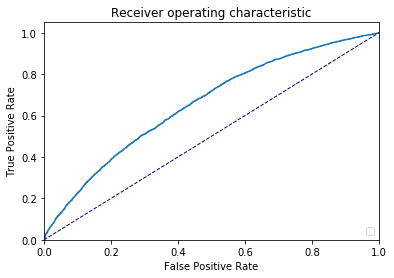

In [166]:
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

<h1> SVM with all important Data scaled
</h1>

In [ ]:
dat = impfeatures_scaled.drop('churn',axis=1)
dat = dat.drop('Customer_ID',axis=1)
target = allfeature_scaled['churn']
X_train,X_test,Y_train,Y_test = train_test_split(dat,target,random_state=0)

In [167]:
svc = SVC(kernel='rbf',gamma = 0.1,C=100)
#modSvc = svc.fit(X_test,Y_test)

In [ ]:

mod = modSvc
Y_test_pred = mod.predict(X_test)
print('accuracy of SVM',mod.score(X_test,Y_test))
confusion=confusion_matrix(Y_test,Y_test_pred)
print(confusion)

In [164]:
Y_test_pred = mod.predict(X_test)
test_probs = mod.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,test_probs[:,1])

In [ ]:
# calculate AUC
auc = roc_auc_score(Y_test, test_probs[:,1])
print('SVM - AUC: %.3f' % auc)

In [ ]:
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

<h1>
Support vector machines with all data scaled
</h1>

In [ ]:
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()